# 梯度下降


### 伪代码：

- bgd
> 优化代价函数是所有关于数据样本的loss，计算整个样本的loss后才更新权值，m为所有样本数量和

    初始权值，迭代次数,单次误差，总误差数组，每一次迭代权值矩阵
    收敛flag：converged
    while 迭代中
        if flag: 结束
        for 每一个权值，
            梯度下降公式，计算每一个下降梯度
        更新$\theta_j$
        计算损失函数J
        if 误差小于精度：
            flag为真
    返回
  
- sgd
> 优化的代价函数是单个数据样本的loss，计算每个样本的loss后就可以立即更新权值，即m=1

    初始权值，迭代次数,单次误差，总误差数组，每一次迭代权值矩阵
    收敛flag：converged
    while 迭代中
        if flag: 结束
        for 每一个权值，
            梯度下降公式，计算$\theta_j$
        计算损失函数J
        if 误差小于精度：
            flag为真
    返回
            

In [374]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm 
from mpl_toolkits.mplot3d import axes3d
import matplotlib.ticker as mtick
import time

In [375]:
def load_dataset(filename):
    """ 读取数据
    数据格式如下：
    “f1 tab f2 tab f3 tab label"
    
    Args:
        filename
    Returns:
        X: 训练样本集矩阵
        y: 标签集矩阵
    """
    feature_number = len(open(filename).readline().split('\t'))-1   #特征数目 = 总行数 - 1
    X = []
    y = []
    file = open(filename)
    for line in file.readlines():   #注意是readlines
        feature_list = []
        current_line = line.strip().split('\t')
        for i in range(feature_number):
            feature_list.append(float(current_line[i]))
        X.append(feature_list)
        y.append(float(current_line[-1]))
    return np.mat(X), np.mat(y).T

X, y = load_dataset('data/ex1.txt')
X.shape

(97, 1)

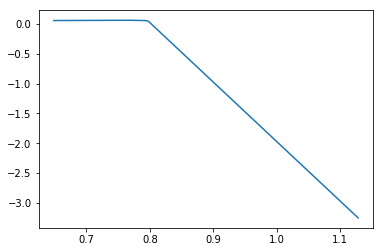

In [395]:
# 创建数据
X = np.array([[1, 2], [1, 6], [1, 8], [1,12], [1,18]])
y = np.array([[2.3],[3.5],[3.9],[7.9],[11.3]])
m, n = X.shape
theta_ground = np.array([[1],[1]])

plt.figure()
plt.plot(thetas[:,1],thetas[:,0],'-')
plt.show()

In [377]:
def h(theta, X):
    """预测函数
    
    Args:
        theta: 相关系数矩阵 (n+1,1)
        x: 特征矩阵 (m,n)
   Return:
       预测结果yhat
    """
    yhat = X @ theta
    print("yhat's shape is = " + str(yhat.shape))
    return yhat

def J(theta, X, y):
    """代价函数
    
    Args:
        theta: 相关系数矩阵
        X: 样本集矩阵
        y: 标签集矩阵
        
    Return:
        预测误差, 浮点数
    """
    m = X.shape[0]
    error = (X @ theta - y).T @ (X @ theta - y) / (2*m)
    return float(error)

In [378]:
def bgd(X, y, learning_rate = 0.01, max_loop = 1000, epsilon = 0.001, print_error = False):
    """批量梯度下降
    
    Args:
        rate: 学习率
        max_loop： 最大迭代次数
        epsilon： 收敛精度
    Return:
        theta: 
        thetas  数组
        errors  数组
        (theta, errors, thetas), time_consumed
    """
    m, n = X.shape  #m 为样本数，  n为特征数
    theta = np.zeros((n, 1))  #初始化theta shape=(n+1,1)
    thetas = []
    error = float('inf')
    errors = []
    counts = 0   
    converted = False
    while counts <= max_loop:
        
        if converted:
            break
        counts += 1
        
        for j in range(n):
            deriv = (X@theta - y).T @ X[:,j] / m
            theta[j] = theta[j] - learning_rate * deriv 
        error = J(theta, X, y) 
        if counts % 100 == 0:
            errors.append(error)
        thetas.append(theta.tolist())
        if print_error and counts % 100 == 0:
            print ("error after iteration %i: %f" %(counts, error))
        if error < epsilon:
            converted = True
            
    thetas = np.squeeze(thetas)
    result = {"theta":theta, 
              "thetas":thetas, 
              "errors":errors}
    return result

result = bgd(X, y)
""""
theta, thetas, errors = result["theta"], result["thetas"], result["errors"]
print("theta's shape is = " + str(result["theta"].shape))
print("thetas's shape is = " + str(result["thetas"].shape))
print("errors's shape is = " + str(result["errors"].shape))
"""

'"\ntheta, thetas, errors = result["theta"], result["thetas"], result["errors"]\nprint("theta\'s shape is = " + str(result["theta"].shape))\nprint("thetas\'s shape is = " + str(result["thetas"].shape))\nprint("errors\'s shape is = " + str(result["errors"].shape))\n'

In [379]:
a1 = [1,2]
a2 = [2,3]

b = np.array(a1)
b.shape

(2,)

In [380]:
#暂时不清楚问题原因

@exe_time
def sgd(X, y, learning_rate=0.01, max_loop=1000, epsilon=0.001):
    """随机梯度下降
    """
    m, n = X.shape
    theta = np.zeros((n,1))
    thetas = []
    error = float('inf')
    errors = []
    count = 0 
    converged = False
    while count < max_loop:
        if converged:
            break
        count += 1
        for i in range(m):
            if converged:
                break
            diff = h(theta, X[i].T) - y[i]
            tmp = np.zeros((n,1))
            for j in range(n):
                tmp[j] = theta[j] - learning_rate * diff * X[i,j]
            theta = tmp
            thetas.append(theta.tolist())
            error = J(theta, X, y)
            errors.append(error.tolist())
            if error < epsilon:
                converged = True
    return theta, thetas, errors
    

# 测试

In [397]:
file_name = 'data/ex1.txt'
X, y = load_dataset(file_name)
m, n = X.shape    #m: examples number; n: featuer numbers

X = np.concatenate((np.ones((m, 1)), X), axis=1)   # 构造矩阵[b X]
print("The shape of X: " + str(X.shape))
rate = 0.01
max_loop = 5000
epsilon = 0.01

result = bgd(X, y, learning_rate, max_loop, epsilon)
theta, thetas, errors = result["theta"], result["thetas"], result["errors"]
print("theta's shape is = " + str(theta.shape))
print("thetas's shape is = " + str(len(thetas)))
print("errors's length is = " + str(len(errors)))

The shape of X: (97, 2)
theta's shape is = (2, 1)
thetas's shape is = 5001
errors's length is = 50


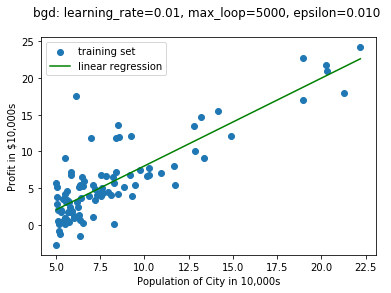

In [398]:
# 绘制拟合曲线
fitting_fig = plt.figure()
title = "bgd: learning_rate=%.2f, max_loop=%d, epsilon=%.3f \n " %(learning_rate, max_loop, epsilon)
ax = fitting_fig.add_subplot(111, title=title)
training_set = ax.scatter(X[:,1].flatten().A[0], y[:,0].flatten().A[0])
x_copy = X.copy()
x_copy.sort(0)
y_hat = x_copy * theta
fitting_line, = ax.plot(x_copy[:,1], y_hat, color='g')

ax.set_xlabel('Population of City in 10,000s')
ax.set_ylabel('Profit in $10,000s')

plt.legend([training_set, fitting_line], ['training set', 'linear regression'])
plt.show()

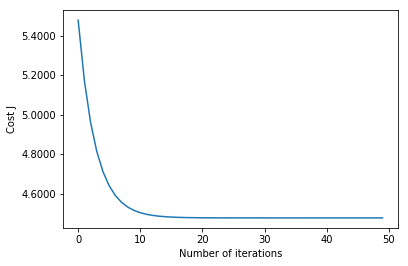

In [399]:
#绘制误差曲线
errors_fig = plt.figure()
ax = errors_fig.add_subplot(111)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.4f'))

ax.plot(range(len(errors)), errors)
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Cost J')

plt.show()

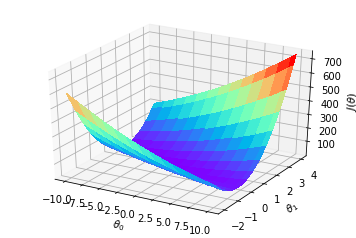

In [400]:
# 绘制能量下降曲面
size = 100
theta_0 = np.linspace(-10,10,size)
theta_1 = np.linspace(-2,4,size)

J_val = np.zeros((size,size))
for i in range(size):
    for j in range(size):
        col = np.matrix([[theta_0[i]], [theta_1[j]]])
        J_val[i,j] = J(col, X, y)
        
theta_0, theta_1 = np.meshgrid(theta_0, theta_1)
J_val = J_val.T
contour_surf = plt.figure()
ax = contour_surf.gca(projection='3d')

ax.plot_surface(theta_0, theta_1, J_val, rstride=8, cstride=8, cmap=cm.rainbow, linewidth=0, antialiased=False)
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_zlabel(r'$J(\theta)$')

plt.show()

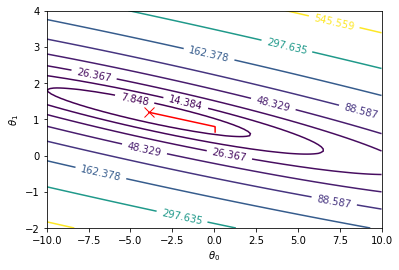

In [401]:
# 绘制能量轮廓
contour_fig = plt.figure()
ax = contour_fig.add_subplot(111)
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')

CS = ax.contour(theta_0, theta_1, J_val, np.logspace(-2,3,20))
plt.clabel(CS, inline=1,fontsize=10)

#绘制最优解
ax.plot(theta[0], theta[1], 'rx', markersize=10, linewidth=2)

#绘制梯度下降过程
thetas = np.array(thetas)
ax.plot(thetas[:,0], thetas[:,1],'r-')

plt.show()